<a href="https://colab.research.google.com/github/BlackCurrantDS/DeepLearning/blob/main/IDL_Assignment11_based_on9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References- 

https://medium.com/@ml.at.berkeley/tricking-neural-networks-create-your-own-adversarial-examples-a61eb7620fd8

https://adversarial-ml-tutorial.org/adversarial_examples/

https://harvard-iacs.github.io/2019-CS109B/lecture/lab21/AdversarialNN/

https://adversarial-ml-tutorial.org/adversarial_examples/

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

https://usmanr149.github.io/urmlblog/cnn/2020/05/01/Salincy-Maps.html


https://mydeeplearningnb.wordpress.com/2019/07/24/visualizing-cnns-using-tensorflow/

https://stackoverflow.com/questions/63107141/how-to-compute-saliency-map-using-keras-backend

Targeted - adding carefully nosie despite looking same to human
non-targated- find any input which tricks model

In [29]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [30]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
len(train_labels)

60000

In [34]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
len(test_labels)

10000

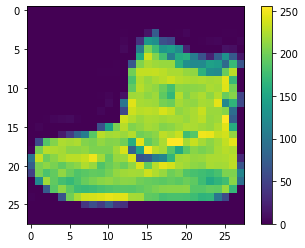

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
train_images = train_images / 255.0

test_images = test_images / 255.0

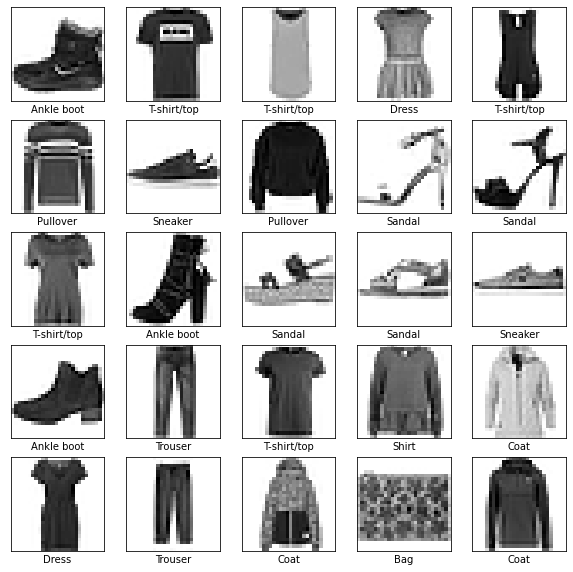

In [39]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6439 - accuracy: 0.7768
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8617
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3426 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2767 - accuracy: 0.8983
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2597 - accuracy: 0.9031
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.242

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3379 - accuracy: 0.8809

Test accuracy: 0.8809000253677368


Ref - https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

In [44]:
first_image = test_images[0]
label=class_names[test_labels[0]]
predictions= model.predict(test_images)
image_probs = np.argmax(predictions[0])

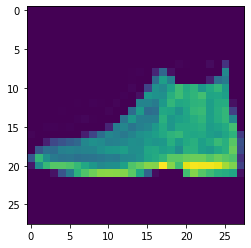

In [45]:
plt.figure()
plt.imshow(first_image) # To change [-1, 1] to [0,1]
plt.show()

In [46]:
label

'Ankle boot'

In [47]:
image_probs

9

In [48]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    print("prediction is", prediction)
    class_idxs_sorted = np.argsort(prediction.numpy().flatten())[::-1]
    #loss = loss_object(input_label, prediction)
    loss = prediction[0][class_idxs_sorted[0]]

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad =  tf.math.abs(gradient)
  return signed_grad

In [49]:
in_image = tf.Variable(first_image.reshape((1, 28, 28)).astype(np.float32) /255.0)

In [50]:
print(test_labels[0])

9


prediction is tf.Tensor(
[[-1.1712418 -6.174225  -3.2496712 -3.6505024 -3.376261   0.8106331
  -1.57105   -3.1650293 -4.2829127 -7.3012133]], shape=(1, 10), dtype=float32)
perturbations is tf.Tensor(
[[[7.50465095e-02 2.91316986e-01 8.43176126e-01 9.02789533e-01
   1.43768400e-01 6.02770805e-01 1.62374401e+00 9.86468673e-01
   7.17012882e-01 8.85232925e-01 2.26151276e+00 2.65734315e+00
   9.02126193e-01 1.39726132e-01 4.11536336e-01 1.12415326e+00
   1.15812898e+00 1.41282177e+00 1.24241400e+00 3.42980146e-01
   1.79300427e+00 2.26496720e+00 1.17239058e+00 1.28604650e+00
   4.24928188e-01 1.57572523e-01 3.43605667e-01 4.82597500e-01]
  [6.80298030e-01 9.67691183e-01 1.29816830e-01 8.25776935e-01
   3.42155695e-01 7.66930461e-01 1.03681052e+00 8.50082457e-01
   4.16644871e-01 1.27344179e+00 1.47605741e+00 8.60458612e-01
   4.75107729e-01 1.07577467e+00 1.08573437e+00 5.11818647e-01
   6.73869073e-01 1.81925511e+00 1.63722372e+00 3.31777036e-02
   8.91272128e-01 5.42793989e-01 1.79010242

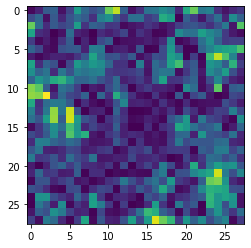

In [51]:
perturbations = create_adversarial_pattern(in_image, test_labels[0])
#print("perturbations is",perturbations)
plt.imshow(perturbations[0]*0.5+0.5) # To change [-1, 1] to [0,1]

In [52]:
perturbations.shape

TensorShape([1, 28, 28])

In [90]:

#dgrad_max_ = np.max(perturbations)[0]
dgrad_max_ = perturbations

In [91]:
dgrad_max_.shape

TensorShape([1, 28, 28])

In [92]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [93]:
grad_eval.shape

TensorShape([1, 28, 28])

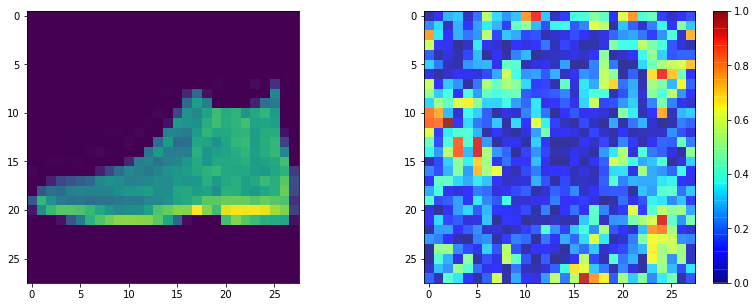

In [94]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(first_image)
i = axes[1].imshow(grad_eval[0],cmap="jet",alpha=0.8)
fig.colorbar(i)